In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

from pycaret.regression import *
from pycaret.classification import *

sns.set_theme()
np.random.seed(50)

df = pd.read_csv("flights.csv")
df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [4]:
df.describe()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [5]:
df.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [6]:
dg = pd.read_csv("airlines.csv")
dg.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [7]:
dk = pd.read_csv("airlines.csv")
dk.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


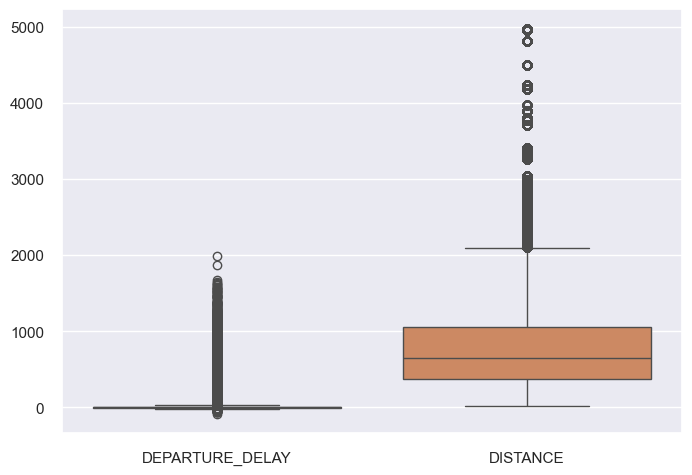

In [ ]:
# Boxplot de atraso de partida e distância
sns.boxplot(data=df[['DEPARTURE_DELAY', 'DISTANCE']])
plt.show()

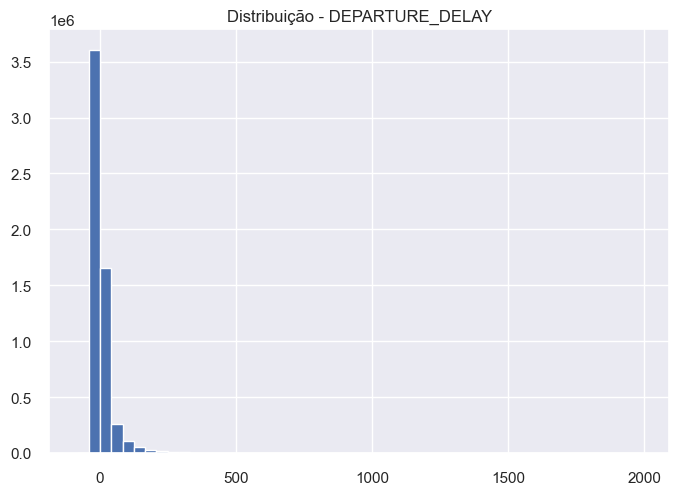

In [ ]:
# Histograma de atraso de partida
df['DEPARTURE_DELAY'].hist(bins=50)
plt.title("Distribuição - DEPARTURE_DELAY")
plt.show()

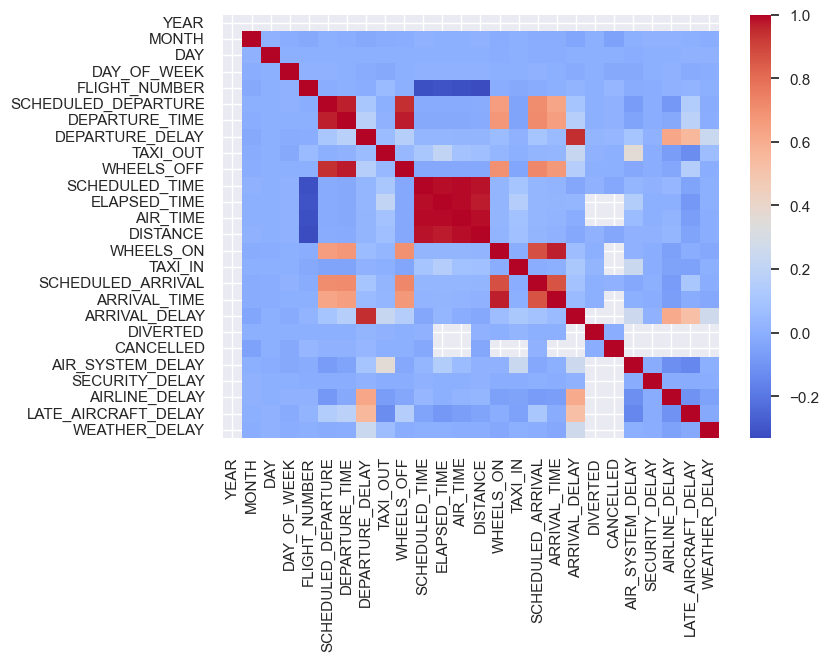

In [ ]:
#Matriz de correlação numérica
correcao = df.select_dtypes(include=['number'])
sns.heatmap(correcao.corr(), annot=False, cmap='coolwarm')
plt.show()

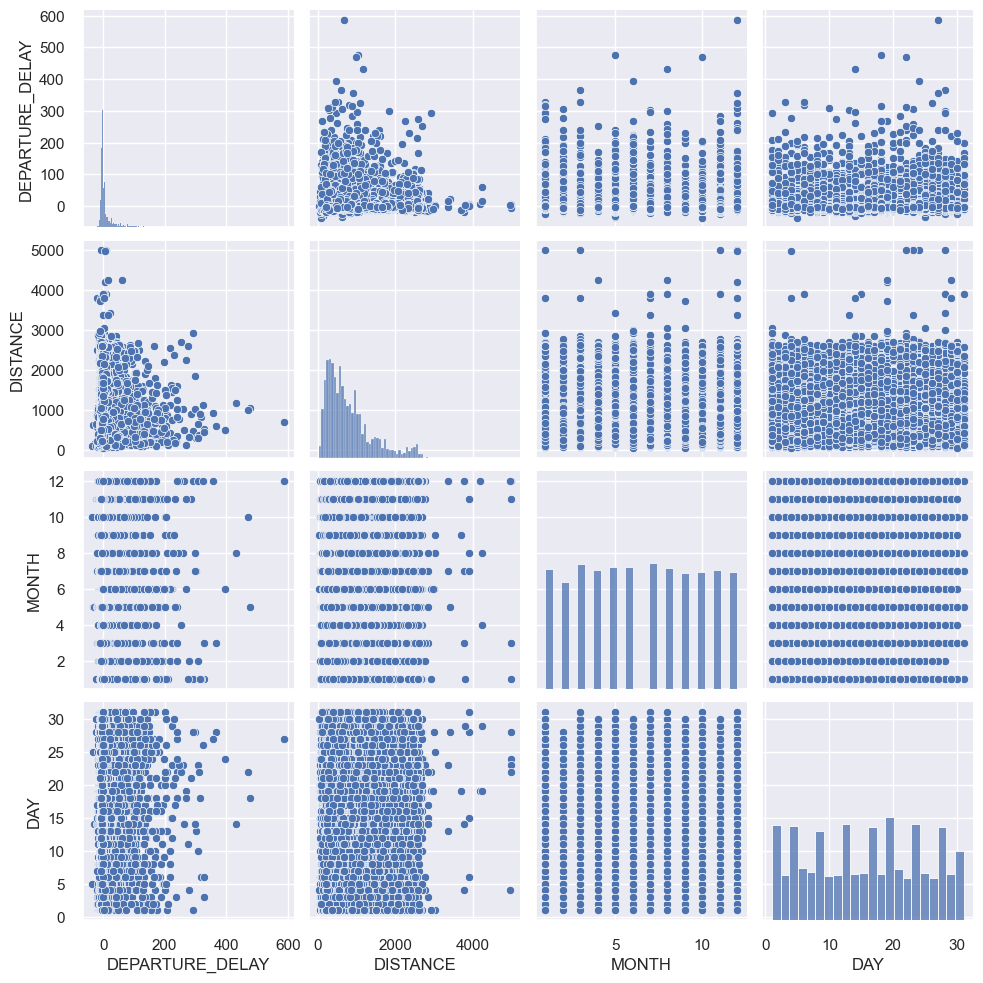

In [ ]:
#Pairplot em amostra menor
df_sample = df[['DEPARTURE_DELAY','DISTANCE','MONTH','DAY']].sample(10_000, random_state=42)

sns.pairplot(df_sample)
plt.show()

In [12]:
df_clean = df.dropna(subset=['ARRIVAL_DELAY']).copy()
df_clean['LATE'] = (df_clean['ARRIVAL_DELAY'] > 15).astype(int)

In [13]:
num_cols = ['DEPARTURE_DELAY','DISTANCE','MONTH','DAY']
df_model = df_clean[num_cols + ['ARRIVAL_DELAY','LATE']]

In [14]:
X = df_model[num_cols]
y = df_model['ARRIVAL_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
formula = "ARRIVAL_DELAY ~ DEPARTURE_DELAY"
model_sm = smf.ols(formula, data=df_model).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 4.739e+07
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:07:44   Log-Likelihood:            -2.2712e+07
No. Observations:             5714008   AIC:                         4.542e+07
Df Residuals:                 5714006   BIC:                         4.542e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.9404      0.006   -888.981      0.000      -4.951      -4.929
DEPARTURE_DELAY     1.0057      0.000   6884.203      0.000       1.005       1.006
==============================================================================
Omnibus:                  2101438.976   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22626989.674
Skew:                           1.463   Prob(JB):                         0.00
Kurtosis:                      12.299   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

In [17]:
df_small = df_clean.sample(50_000, random_state=42)

X = df_small[num_cols]
y = df_small['ARRIVAL_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)

LinearRegression()

In [19]:
# Amostra de 100.000 linhas para trabalhar
df_sample = df.sample(100_000, random_state=42).copy()
print("Shape da amostra:", df_sample.shape)

df_sample.head()


Shape da amostra: (100000, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remover linhas
df_clean = df_sample.dropna(subset=['ARRIVAL_DELAY']).copy()
print("Shape após remover NA em ARRIVAL_DELAY:", df_clean.shape)
df_clean['LATE'] = (df_clean['ARRIVAL_DELAY'] > 15).astype(int)
df_clean[['ARRIVAL_DELAY', 'LATE']].head()


Shape após remover NA em ARRIVAL_DELAY: (98195, 31)


,ARRIVAL_DELAY,LATE
1508570,-13.0,0
363270,-12.0,0
3003945,-8.0,0
2291425,152.0,1
2973084,-2.0,0


In [24]:
num_cols = ['DEPARTURE_DELAY', 'DISTANCE', 'MONTH', 'DAY']

df_model = df_clean[num_cols + ['ARRIVAL_DELAY', 'LATE']].copy()
df_model.describe().T


,count,mean,std,min,25%,50%,75%,max
DEPARTURE_DELAY,98195.0,9.311136,36.886612,-36.0,-5.0,-2.0,7.0,1576.0
DISTANCE,98195.0,825.277998,608.412431,31.0,374.0,649.0,1067.0,4983.0
MONTH,98195.0,6.540302,3.399689,1.0,4.0,7.0,9.0,12.0
DAY,98195.0,15.719018,8.774621,1.0,8.0,16.0,23.0,31.0
ARRIVAL_DELAY,98195.0,4.424237,39.272194,-70.0,-13.0,-5.0,8.0,1557.0
LATE,98195.0,0.180172,0.384333,0.0,0.0,0.0,0.0,1.0


In [25]:
X = df_model[num_cols]
y = df_model['ARRIVAL_DELAY']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((78556, 4), (19639, 4))

In [27]:
df_reg_sm = df_model[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].copy()

model_sm = smf.ols("ARRIVAL_DELAY ~ DEPARTURE_DELAY", data=df_reg_sm).fit()
model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 8.069e+05
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:21:19   Log-Likelihood:            -3.9071e+05
No. Observations:               98195   AIC:                         7.814e+05
Df Residuals:                   98193   BIC:                         7.814e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.9359      0.043   -115.937      0.000      -5.019      -4.852
DEPARTURE_DELAY     1.0053      0.001    898.287      0.000       1.003       1.007
==============================================================================
Omnibus:                    36761.824   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404337.091
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                      12.485   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

Rlm = lr.predict(X_test)

mae = mean_absolute_error(y_test, Rlm)
rmse = mean_squared_error(y_test, Rlm, squared=False)
r2 = r2_score(y_test, Rlm)

print("Regressão Linear Múltipla:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")


Regressão Linear Múltipla:
MAE  = 9.07
RMSE = 13.04
R²   = 0.8937


In [ ]:
# Para não estourar memória, usamos apenas duas features no polinômio
basePoli = X_train[['DEPARTURE_DELAY', 'DISTANCE']]

poly = PolynomialFeatures(degree=2, include_bias=False)
xpolinom = poly.fit_transform(basePoli)

lrpolimon = LinearRegression()
lrpolimon.fit(xpolinom, y_train)

# Transformar X_test de forma consistente
testeX = poly.transform(X_test[['DEPARTURE_DELAY', 'DISTANCE']])
predicaoY = lrpolimon.predict(testeX)

m = mean_absolute_error(y_test, predicaoY)
polinomrse = mean_squared_error(y_test, predicaoY, squared=False)
R2 = r2_score(y_test, predicaoY)

print("Regressão Polinomial:")
print(f"MAE  = {m:.2f}")
print(f"RMSE = {polinomrse:.2f}")
print(f"R**2   = {R2:.4f}")


Regressão Polinomial (grau 2):
MAE  = 9.07
RMSE = 13.03
R**2   = 0.8938
